Gabriel Nemeth Analysis

This Assignment predicts if the character in the 'Game of Thrones' book series is still alive.

# Importing Data

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import gender_guesser.detector as gender # guess gender based on (given) name
import numpy as np                       #
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# loading data
file = './Assignment 2/GOT_character_predictions.xlsx'
got = pd.read_excel( io = file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 5)

S.No                  name                 title   culture  dateOfBirth              mother            father                heir           house               spouse  book1_A_Game_Of_Thrones  book2_A_Clash_Of_Kings  book3_A_Storm_Of_Swords  book4_A_Feast_For_Crows  book5_A_Dance_with_Dragons  isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  isNoble   age  numDeadRelations  popularity  isAlive
0     1  Viserys II Targaryen                   NaN       NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  Aegon IV Targaryen             NaN                  NaN                        0                       0                        0                        0                           0            1.0            0.0          0.0            NaN          0        0   NaN                11    0.605351        0
1     2           Walder Frey  Lord of the Crossing  Rivermen        208.0                 NaN               NaN                 NaN      House Frey          Perra Royce                        1                       1                        1                        1                           1            NaN            NaN          NaN            1.0          1        1  97.0                 1    0.896321        1
2     3          Addison Hill                   Ser       NaN          NaN                 NaN               NaN                 NaN     House Swyft                  NaN                        0                       0                        0                        1                           0            NaN            NaN          NaN            NaN          0        1   NaN                 0    0.267559        1
3     4           Aemma Arryn                 Queen       NaN         82.0                 NaN               NaN                 NaN     House Arryn  Viserys I Targaryen                        0                       0                        0                        0                           0            NaN            NaN          NaN            0.0          1        1  23.0                 0    0.183946        0
4     5        Sylva Santagar            Greenstone   Dornish        276.0                 NaN               NaN                 NaN  House Santagar      Eldon Estermont                        0                       0                        0                        1                           0            NaN            NaN          NaN            1.0          1        1  29.0                 0    0.043478        1

In [2]:
# pulling up data dictionary
got_description = pd.read_excel(io = './Assignment 2/GOT_data_dictionary.xlsx',
                                header = None,
                                names = ['Features', 'Description'])


# displaying the data dictionary
got_description

Features                                                                                          Description
0                         S.No                                                            Character number (by order of appearance)
1                         name                                                                                       Character name
2                        title                                                            Honorary title(s) given to each character
3                         male                                                                                 1 = male, 0 = female
4                      culture                                                          Indicates the cultural group of a character
5                  dateOfBirth                                        Known dates of birth for each character (measurement unknown)
6                       mother                                                                        Character's biological mother
7                       father                                                                        Character's biological father
8                         heir                                                                          Character's biological heir
9                        house                               Indicates a character's allegiance to a house (i.e. a powerful family)
10                      spouse                                                                                Character's spouse(s)
11     book1_A_Game_Of_Thrones                                                     1 = appeared in book, 0 = did not appear in book
12      book2_A_Clash_Of_Kings                                                     1 = appeared in book, 0 = did not appear in book
13     book3_A_Storm_Of_Swords                                                     1 = appeared in book, 0 = did not appear in book
14     book4_A_Feast_For_Crows                                                     1 = appeared in book, 0 = did not appear in book
15  book5_A_Dance_with_Dragons                                                     1 = appeared in book, 0 = did not appear in book
16               isAliveMother                                                                             1 = alive, 0 = not alive
17               isAliveFather                                                                             1 = alive, 0 = not alive
18                 isAliveHeir                                                                             1 = alive, 0 = not alive
19               isAliveSpouse                                                                             1 = alive, 0 = not alive
20                   isMarried                                                                         1 = married, 0 = not married
21                     isNoble                                                                             1 = noble, 0 = not noble
22                         age                                                                             Character's age in years
23            numDeadRelations                                       Total number of deceased relatives throughout all of the books
24                  popularity  Indicates the popularity of a character (1 = extremely popular (max), 0 = extremely unpopular (m...
25                     isAlive                                                                             1 = alive, 0 = not alive

# Flagging Values

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Flagging the columns with missing values.</strong><br><br>
Many of the columns contain extremely high numbers of missing values and because of this I decided to flag these values.

In [3]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

In [4]:
# checking the number of missing values
got.isnull().sum(axis=0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [5]:
# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Inputing 'Unknown' for categorical missing values.</strong><br><br>
Since there was no way to input the missing values with actual data, I decided to use the 'Unknown' values so that the models are able to run. If I find more information on the column, I will be able to come back and switch it.

In [6]:
# create the list of categorical features to be imputed
categ_feat =['title','culture', 'mother', 'father', 'heir','spouse', 'isAliveMother',\
                  'isAliveFather', 'isAliveHeir', 'isAliveSpouse']      

# create a loop to automatically fill in the missing values of the features selected 

for col in got[categ_feat]:
    if got[col].isnull().astype(int).sum()>0:
        got[col] = got[col].fillna('Unknown')

got.isnull().sum()



S.No                             0
name                             0
title                            0
culture                          0
dateOfBirth                   1513
mother                           0
father                           0
heir                             0
house                          427
spouse                           0
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                    0
isAliveFather                    0
isAliveHeir                      0
isAliveSpouse                    0
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_title                          0
m_culture                        0
m_dateOfBirth                    0
m_mother            

# Feature Engineering

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Dealing with age and dateOfBirth</strong><br><br>
I noticed that there were two big outliers in both of these features. These outliers were making it difficult to visualize the distribution of the data. To plot this dataset on histograms, I had to remove the negative values and with it, the distribution became more clear. 

On the age feature, we can see that it was best to use the median of the data to input for the missing values. Even with only calculating the mean of the positive value the median was still the best.

On the dateOfBirth feature, we can see that the mode was also the best value to input on the misisng values.

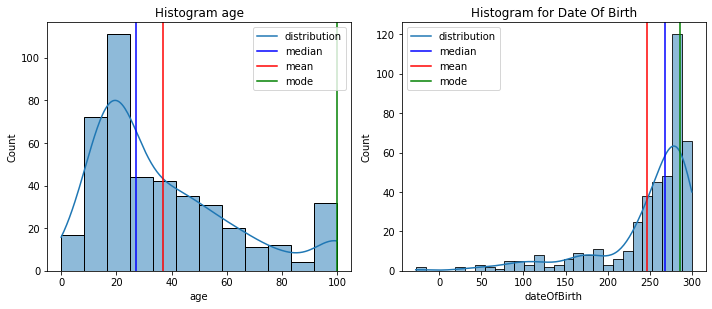

In [7]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# soft coding a list for the labels of the legend
legend_labels = ['distribution','median','mean','mode']

# developing a histogram for feature meduc
plt.subplot(2, 2, 1)
sns.histplot(data   = got[got['age']>=0],
             x      = 'age',
             kde    = True)

# placing vertical lines in the plot for the median, mean and mode
plt.axvline(x = got['age'].median() , color = 'blue' )
plt.axvline(x = got['age'][got['age']>=0].mean()   , color = 'red'  )
plt.axvline(x = got['age'].mode()[0], color = 'green')

# creating a legend
plt.legend(labels =  legend_labels)

# title and axis labels
plt.title(label   = 'Histogram age')
plt.xlabel(xlabel = 'age')
plt.ylabel(ylabel = "Count")


########################


# developing a histogram for feature dateOfBirth
plt.subplot(2, 2, 2)
sns.histplot(data   = got[got['age']>=0],
             x      = 'dateOfBirth',
             kde    = True)

# placing vertical lines in the plot for the median, mean and mode
plt.axvline(x = got['dateOfBirth'].median() , color = 'blue' )
plt.axvline(x = got['dateOfBirth'][got['age']>=0].mean()   , color = 'red'  )
plt.axvline(x = got['dateOfBirth'].mode()[0], color = 'green')

# creating a legend
plt.legend(labels =  legend_labels)

# title and axis labels
plt.title(label   = 'Histogram for Date Of Birth')
plt.xlabel(xlabel = 'dateOfBirth')
plt.ylabel(ylabel = "Count")


########################
plt.tight_layout()
plt.show()








In [8]:
# replacing missing values with median 
missing_age= got['age'].median()

got.loc[:,'age'].fillna(value=missing_age , inplace=True)

#double check missing values where replaced
got.loc[:,'age'].isnull().sum(axis=0)

0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Dropping dateOfBirth.</strong><br><br>
Because age and dateOfBirth are basically the same thing, and have high correlations I decided to only use age and drop dateOfBirth, therefore I will not even use it.

In [9]:
# # replacing missing values with mode
# missing_dob= got['dateOfBirth'].mode()

# got.loc[:,'dateOfBirth'].fillna(value=missing_dob , inplace=True)

# #double check missing values where replaced
# got.loc[:,'dateOfBirth'].isnull().sum(axis=0)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Joining the main powerful houses of the series together.</strong><br><br>
Because there were lots of houses in the dataset, I decided to group the main ones together. The thought process behind it was that if the character was in one of the main houses, he/she might have a bigger correlation if he/she was alive or dead.

In [10]:
# checking the observations of 'house'
got['house'].describe()

count              1519
unique              347
top       Night's Watch
freq                105
Name: house, dtype: object

In [11]:
# counting the value of each house
got['house'].value_counts()

Night's Watch                              105
House Frey                                  97
House Stark                                 72
House Targaryen                             62
House Lannister                             49
House Greyjoy                               41
House Tyrell                                36
House Martell                               29
House Osgrey                                21
Faith of the Seven                          17
House Arryn                                 16
House Hightower                             16
House Bracken                               14
House Florent                               13
House Botley                                13
House Baratheon                             13
House Bolton                                13
Brave Companions                            12
House Tully                                 12
House Whent                                 11
Brotherhood without banners                 11
House Velaryo

In [12]:
# create new feature using a np where() function
# joining the main houses in a new column named 'main_house'

got['main_house'] = np.where((got['house'] == 'House Tully') | 
                                  (got['house'] == 'House Arryn')| 
                                  (got['house'] == 'House Martell')| 
                                  (got['house'] == 'House Baratheon')| 
                                  (got['house'] == 'House Tyrell') | 
                                  (got['house'] == 'House Greyjoy') | 
                                  (got['house'] == 'House Lannister') | 
                                  (got['house'] == 'House Targaryen') | 
                                  (got['house'] == 'House Stark') | 
                                  (got['house'] == 'House Umber') | 
                                  (got['house'] == 'House Mormont') |  
                                  (got['house'] == 'House Karstark') | 
                                  (got['house'] == 'House Baratheon of Dragonstone'),1,0)



# check if funtion works
got['main_house'].value_counts()

0    1585
1     361
Name: main_house, dtype: int64

In [13]:
# first turn into the type into boolean

got['numDeadRelations'] = got['numDeadRelations'].astype('bool')


# turn options into dummy to only have the binary option

got['numDeadRelations_True']= pd.get_dummies(got['numDeadRelations'], drop_first=True)

# got['numDeadRelations_True'].value_counts()

# Gender Guess

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Spltting the name from the character's full name to the first name.</strong><br><br>
I tried running the gender guesser with all the names but noticed that there are several unknowns that the algorithm did not identify. I split the name like this so that the gender guesser function can have more chances of guessing if the character is male or female.

In [14]:
# STEP 1: splitting personal name

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in got.iterrows():
    
    # splitting email domain at ' '
    split_first_name = got.loc[index, 'name'].split(sep = ' ')[0]
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_first_name)
    

# converting placeholder_lst into a DataFrame 
first_name_df = pd.DataFrame(placeholder_lst)


# displaying the results
got['first_name']=first_name_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Commenting out the gender guesser code.</strong><br><br>
Because the gender guesser algorithm takes a lot of time to run, I decided to run it once and print the values using a loop. After I copied and pasted the values into a list, converted the list into a series and added them into the dataset.

In [15]:
# # guessing gender based on (given) name

# # placeholder list
# placeholder_lst = []


# # looping to guess gender
# for name in got['first_name']:
#     guess = gender.Detector().get_gender(name)
#     print(guess)
#     placeholder_lst.append(guess)


# # converting list into a series
# got['gender_guess'] = pd.Series(placeholder_lst)


# # checking results
# got.head()

In [16]:
# # looping over the guess values so that we don't have to hard code
# for val in got['gender_guess']:
#     print(f"""'{val}'""", end = ', ')

In [17]:
# copied and pasted the values in the list

gender_guess_list = ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

# putting the list into a series so that it can be added to column

got['gender_guess'] = pd.Series(gender_guess_list)

# printing to check results

got[['name','first_name','gender_guess']].head(n=10)

name first_name gender_guess
0  Viserys II Targaryen    Viserys      unknown
1           Walder Frey     Walder      unknown
2          Addison Hill    Addison         andy
3           Aemma Arryn      Aemma      unknown
4        Sylva Santagar      Sylva       female
5      Tommen Baratheon     Tommen      unknown
6      Valarr Targaryen     Valarr      unknown
7   Viserys I Targaryen    Viserys      unknown
8               Wilbert    Wilbert         male
9        Wilbert Osgrey    Wilbert         male

In [18]:
# counting the number of outputs
got['gender_guess'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: gender_guess, dtype: int64

In [19]:
# one hot encoding variables
one_hot_gender_guess = pd.get_dummies(got['gender_guess'])

# joining codings together
got = got.join(other = [one_hot_gender_guess])


# checking results
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'main_house', 'numDeadRelations_True', 'first_name', 'gender_guess', 'andy', 'female', 'male', 'mostly_female', 'mostly_male', 'unknown'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Creating one column as is_male</strong><br><br>
Since andy is an answer to being male and female, I had to decide to add it to either one of them. I added male, mostly_male, and andy to a single column. 

I did not do anything with the female and mostly_female values because I had the intention of dropping them.

In [20]:
# joining the male, mostly_male, and andy as a single column

got['is_male'] = got['male'] + got['mostly_male'] + got['andy']

# checking results

got['is_male'].value_counts()

0    1531
1     415
Name: is_male, dtype: int64

In [21]:
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'main_house', 'numDeadRelations_True', 'first_name', 'gender_guess', 'andy', 'female', 'male', 'mostly_female', 'mostly_male', 'unknown', 'is_male'], dtype='object')

# Models

## Preparing Variables

In [22]:
# making a copy of the data

got_data = got.copy()

# preparing explanatory variable data
got_data   = got.drop([
# 'isAlive'
# 'S.No',
'name',
'title',
'culture',
'dateOfBirth',
'mother',
'father',
'heir',
'house',
'spouse',
# 'book1_A_Game_Of_Thrones',
# 'book2_A_Clash_Of_Kings',
# 'book3_A_Storm_Of_Swords',
# 'book4_A_Feast_For_Crows',
# 'book5_A_Dance_with_Dragons',
'isAliveMother',
'isAliveFather',
'isAliveHeir',
'isAliveSpouse',
# 'isMarried',
# 'isNoble',
# 'age',
'numDeadRelations',
# 'popularity',
# 'm_title',
# 'm_culture',
'm_dateOfBirth',
# 'm_mother',
# 'm_father',
# 'm_heir',
# 'm_house',
# 'm_spouse',
# 'm_isAliveMother',
# 'm_isAliveFather',
# 'm_isAliveHeir',
# 'm_isAliveSpouse',
'm_age',
# 'main_house',
# 'numDeadRelations_True',
'first_name',
'gender_guess',
'andy',
'female',
'male',
'mostly_female',
'mostly_male',
'unknown',],
# 'is_male'],
                               axis = 1)

got_target = got.loc[: , 'isAlive']

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this notebook.

In [23]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [24]:
# creating a (Pearson) correlation matrix
df_corr = got_data.corr().round(2)


# printing (Pearson) correlations with bwght
print(df_corr.loc['isAlive'].sort_values(ascending = False))

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_isAliveFather               0.14
m_isAliveMother               0.14
m_mother                      0.14
m_father                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
m_isAliveSpouse               0.05
age                           0.05
m_spouse                      0.05
m_culture                     0.04
m_house                       0.04
m_title                       0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
is_male                      -0.00
isNoble                      -0.04
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
main_house                   -0.10
S.No                         -0.13
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations_True        -0.19
Name: isAlive, dtype: float64


In [25]:
# preparing explanatory variable data
got_data   = got.drop([
'isAlive',
# 'S.No',
'name',
'title',
'culture',
'dateOfBirth',
'mother',
'father',
'heir',
'house',
'spouse',
# 'book1_A_Game_Of_Thrones',
# 'book2_A_Clash_Of_Kings',
# 'book3_A_Storm_Of_Swords',
# 'book4_A_Feast_For_Crows',
# 'book5_A_Dance_with_Dragons',
'isAliveMother',
'isAliveFather',
'isAliveHeir',
'isAliveSpouse',
# 'isMarried',
# 'isNoble',
# 'age',
'numDeadRelations',
# 'popularity',
# 'm_title',
# 'm_culture',
'm_dateOfBirth',
# 'm_mother',
# 'm_father',
# 'm_heir',
# 'm_house',
# 'm_spouse',
# 'm_isAliveMother',
# 'm_isAliveFather',
# 'm_isAliveHeir',
# 'm_isAliveSpouse',
'm_age',
# 'main_house',
# 'numDeadRelations_True',
'first_name',
'gender_guess',
'andy',
'female',
'male',
'mostly_female',
'mostly_male',
'unknown',],
# 'is_male'],
                               axis = 1)

## Logistic Regression

In [26]:
# stratifying response variables
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [27]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [28]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [29]:
# preparing explanatory variable data
got_data   = got.drop([
'isAlive',
# 'S.No',
'name',
'title',
'culture',
'dateOfBirth',
'mother',
'father',
'heir',
'house',
'spouse',
# 'book1_A_Game_Of_Thrones',
# 'book2_A_Clash_Of_Kings',
# 'book3_A_Storm_Of_Swords',
# 'book4_A_Feast_For_Crows',
# 'book5_A_Dance_with_Dragons',
'isAliveMother',
'isAliveFather',
'isAliveHeir',
'isAliveSpouse',
# 'isMarried',
# 'isNoble',
# 'age',
'numDeadRelations',
# 'popularity',
# 'm_title',
# 'm_culture',
'm_dateOfBirth',
# 'm_mother',
# 'm_father',
# 'm_heir',
# 'm_house',
# 'm_spouse',
# 'm_isAliveMother',
# 'm_isAliveFather',
# 'm_isAliveHeir',
# 'm_isAliveSpouse',
'm_age',
# 'main_house',
# 'numDeadRelations_True',
'first_name',
'gender_guess',
'andy',
'female',
'male',
'mostly_female',
'mostly_male',
'unknown',],
# 'is_male'],
                               axis = 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Build a Univariate Logistic Regression Model</h4><br>
Building a logistic regression model using the explanatory variable that is most highly correlated with the response variable.

In [30]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows""",
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-05 14:03  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>e) Build a logistic regression model in statsmodels using all of the explanatory variables.</h4>


In [31]:
for val in got_data:
    print(f" {val}+")

 S.No+
 book1_A_Game_Of_Thrones+
 book2_A_Clash_Of_Kings+
 book3_A_Storm_Of_Swords+
 book4_A_Feast_For_Crows+
 book5_A_Dance_with_Dragons+
 isMarried+
 isNoble+
 age+
 popularity+
 m_title+
 m_culture+
 m_mother+
 m_father+
 m_heir+
 m_house+
 m_spouse+
 m_isAliveMother+
 m_isAliveFather+
 m_isAliveHeir+
 m_isAliveSpouse+
 main_house+
 numDeadRelations_True+
 is_male+


In [32]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ 
 book1_A_Game_Of_Thrones+
 book2_A_Clash_Of_Kings+
 book3_A_Storm_Of_Swords+
 book4_A_Feast_For_Crows+
 book5_A_Dance_with_Dragons+
 isMarried+
 isNoble+
 age+
 popularity+
 m_title+
 m_culture+
 m_mother+
 m_father+
 m_heir+
 m_house+
 m_spouse+
 m_isAliveMother+
 m_isAliveFather+
 m_isAliveHeir+
 m_isAliveSpouse+
 main_house+
 numDeadRelations_True+
 is_male""",
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.497189
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Logit
==============================================================================================
Model:                         Logit                     Pseudo R-squared:          0.123     
Dependent Variable:            isAlive                   AIC:                       1779.1547 
Date:                          2021-12-05 14:03          BIC:                       1883.0456 
No. Observations:              1751                      Log-Likelihood:            -870.58   
Df Model:                      18                        LL-Null:                   -992.53   
Df Residuals:                  1732                      LLR p-value:               1.4067e-41
Converged:                     1.0000                    Scale:                     1.0000    
No. Iterations:                14.0000                                                        
----------------------------------------------------------------------------------------------
                            Coef.     Std.Err.      z    P>|z|       [0.025         0.975]    
----------------------------------------------------------------------------------------------
Intercept                  -0.7363           nan     nan    nan             nan            nan
book1_A_Game_Of_Thrones    -0.4658        0.1603 -2.9063 0.0037         -0.7799        -0.1517
book2_A_Clash_Of_Kings     -0.3100        0.1414 -2.1927 0.0283         -0.5871        -0.0329
book3_A_Storm_Of_Swords    -0.2810        0.1474 -1.9058 0.0567         -0.5699         0.0080
book4_A_Feast_For_Crows     1.6241        0.1504 10.7994 0.0000          1.3293         1.9188
book5_A_Dance_with_Dragons -0.0193        0.1453 -0.1328 0.8944         -0.3040         0.2654
isMarried                  -0.5604           nan     nan    nan             nan            nan
isNoble                    -0.1068        0.4541 -0.2352 0.8140         -0.9968         0.7832
age                         0.0000        0.0001  0.4246 0.6711         -0.0001         0.0001
popularity                 -0.8961        0.4866 -1.8418 0.0655         -1.8498         0.0575
m_title                     0.0106        0.4511  0.0235 0.9812         -0.8734         0.8947
m_culture                   0.0690        0.1354  0.5096 0.6104         -0.1964         0.3344
m_mother                    0.6601  9666087.6979  0.0000 1.0000  -18945183.0991  18945184.4193
m_father                    0.0598 52528840.0801  0.0000 1.0000 -102954634.6468 102954634.7665
m_heir                      0.2027  4387101.4157  0.0000 1.0000   -8598560.5685   8598560.9739
m_house                     0.4224        0.1683  2.5100 0.0121          0.0926         0.7523
m_spouse                   -0.1759           nan     nan    nan             nan            nan
m_isAliveMother             0.6601  9666087.6979  0.0000 1.0000  -18945183.0991  18945184.4193
m_isAliveFather             0.0598 52528840.0801  0.0000 1.0000 -102954634.6468 102954634.7665
m_isAliveHeir               0.2027  4387101.4157  0.0000 1.0000   -8598560.5686   8598560.9739
m_isAliveSpouse            -0.1759           nan     nan    nan             nan            nan
main_house                 -0.0115        0.1648 -0.0695 0.9446         -0.3346         0.3116
numDeadRelations_True      -0.7178        0.2617 -2.7428 0.0061         -1.2307        -0.2049
is_male                    -0.1181        0.1488 -0.7942 0.4271         -0.4097         0.1734
==============================================================================================

"""

## Logistics Without High P-Values

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>High P-Value Removal.</strong><br>
Removed the highest p-values and ran the regression again.

In [33]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ 
 book1_A_Game_Of_Thrones+
 book2_A_Clash_Of_Kings+
 book3_A_Storm_Of_Swords+
 book4_A_Feast_For_Crows+
 popularity+
 m_house+
 numDeadRelations_True+
 is_male""",
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.500273
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.117     
Dependent Variable:   isAlive            AIC:                1769.9549 
Date:                 2021-12-05 14:03   BIC:                1819.1664 
No. Observations:     1751               Log-Likelihood:     -875.98   
Df Model:             8                  LL-Null:            -992.53   
Df Residuals:         1742               LLR p-value:        6.4986e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.7284   0.1089  6.6865 0.0000  0.5149  0.9419
book1_A_Game_Of_Thrones -0.4222   0.1553 -2.7192 0.0065 -0.7265 -0.1179
book2_A_Clash_Of_Kings  -0.2971   0.1395 -2.1304 0.0331 -0.5705 -0.0238
book3_A_Storm_Of_Swords -0.2278   0.1425 -1.5982 0.1100 -0.5071  0.0515
book4_A_Feast_For_Crows  1.6307   0.1407 11.5897 0.0000  1.3550  1.9065
popularity              -1.4941   0.4242 -3.5223 0.0004 -2.3254 -0.6627
m_house                  0.3773   0.1521  2.4811 0.0131  0.0793  0.6754
numDeadRelations_True   -0.8545   0.2482 -3.4426 0.0006 -1.3409 -0.3680
is_male                 -0.1170   0.1458 -0.8030 0.4220 -0.4027  0.1686
=======================================================================

"""

## Logistics Without P-Values Part 2

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>High P-Value Removal.</strong><br>
Removed the remaining high p-values and ran the regression again.

In [34]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ 
 book1_A_Game_Of_Thrones+
 book2_A_Clash_Of_Kings+
 book4_A_Feast_For_Crows+
 popularity+
 m_house+
 numDeadRelations_True""",
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.501151
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.116     
Dependent Variable:   isAlive            AIC:                1769.0324 
Date:                 2021-12-05 14:03   BIC:                1807.3080 
No. Observations:     1751               Log-Likelihood:     -877.52   
Df Model:             6                  LL-Null:            -992.53   
Df Residuals:         1744               LLR p-value:        7.5241e-47
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.6586   0.0983  6.7008 0.0000  0.4659  0.8512
book1_A_Game_Of_Thrones -0.4330   0.1550 -2.7929 0.0052 -0.7369 -0.1291
book2_A_Clash_Of_Kings  -0.3507   0.1341 -2.6148 0.0089 -0.6136 -0.0878
book4_A_Feast_For_Crows  1.5421   0.1288 11.9703 0.0000  1.2896  1.7946
popularity              -1.5106   0.4241 -3.5621 0.0004 -2.3418 -0.6795
m_house                  0.4018   0.1508  2.6639 0.0077  0.1062  0.6974
numDeadRelations_True   -0.8569   0.2482 -3.4517 0.0006 -1.3434 -0.3703
=======================================================================

"""

## Logistic Regression in Scikit-Learn

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In an effort to stay organized, we can put each model into a dictionary. Run the code below to produce a dictionary of each model's explanatory variables.

In [35]:
# explanatory sets from last session

# creating a dictionary to store candidate models

got_dict = {

 # full model
 'logit_full'   : [ 'S.No','book1_A_Game_Of_Thrones',
 'book2_A_Clash_Of_Kings',
 'book3_A_Storm_Of_Swords',
 'book4_A_Feast_For_Crows',
 'book5_A_Dance_with_Dragons',
 'isMarried',
 'isNoble',
 'age',
 'popularity',
 'm_title',
 'm_culture',
 'm_mother',
 'm_father',
 'm_heir',
 'm_house',
 'm_spouse',
 'm_isAliveMother',
 'm_isAliveFather',
 'm_isAliveHeir',
 'm_isAliveSpouse',
 'main_house',
 'numDeadRelations_True',
 'is_male'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['S.No','book1_A_Game_Of_Thrones',
                 'book2_A_Clash_Of_Kings',
                 'book3_A_Storm_Of_Swords',
                 'book4_A_Feast_For_Crows',
                 'popularity',
                 'm_house',
                 'numDeadRelations_True',
                 'is_male'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['S.No','book1_A_Game_Of_Thrones',
                 'book2_A_Clash_Of_Kings',
                 'book4_A_Feast_For_Crows',
                 'popularity',
                 'm_house',
                 'numDeadRelations_True']

}

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Dynamically print each explanatory variable set.</h4><br>


In [36]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{got_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{got_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{got_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'popularity', 'm_title', 'm_culture', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'main_house', 'numDeadRelations_True', 'is_male']


First Significant p-value Model:
--------------------------------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'popularity', 'm_house', 'numDeadRelations_True', 'is_male']


Second Significant p-value Model:
---------------------------------
['S.No', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book4_A_Feast_For_Crows', 'popularity', 'm_house', 'numDeadRelations_True']



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Build a logistic regression model in scikit-learn</h4>
Build a logistic regression model in scikit-learn using the <strong>logit_sig</strong> explanatory variables and <strong>isAlive</strong> as the response variable.

In [37]:
# train/test split with the full model
got_data   =  got.loc[ : , got_dict['logit_sig']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7676
Testing  ACCURACY: 0.8615


<br><br>
<h3>The Confusion Matrix</h3><br>
The confusion matrix in Python can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                          |
PREDICTED: Char. is Alive (isAlive=1)     |PREDICTED:Char. is not alive(isAlive=0)
ACTUAL:    Char. is Alive (isAlive=1)     |ACTUAL:    Char. is Alive   (isAlive=1)
                                          |
----------------------------------------- |-------------------------------------
                                          |
PREDICTED: Char. is Alive (isAlive=1)     |PREDICTED:Char. is not alive(isAlive=0)
ACTUAL:    Char. is not alive (isAlive=0) |ACTUAL:   Char. is not alive(isAlive=0)
                                          |  
~~~



In [38]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 29  21]
 [  6 139]]


In [39]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 6
True Positives : 139



## Area Under the Curve (AUC)

In [40]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.7693


In [41]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[got_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 1.22)
('S.No', -0.0)
('book1_A_Game_Of_Thrones', -0.37)
('book2_A_Clash_Of_Kings', -0.23)
('book4_A_Feast_For_Crows', -0.16)
('popularity', 1.76)
('m_house', -0.68)
('numDeadRelations_True', 0.21)


#  Classification Trees (CART Models)

## Full Tree

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
Run the following code to load the user-defined functions used throughout this notebook.

In [42]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [43]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.7333
Full Tree AUC Score: 0.6962


In [44]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 31
False Positives: 19
False Negatives: 33
True Positives : 112



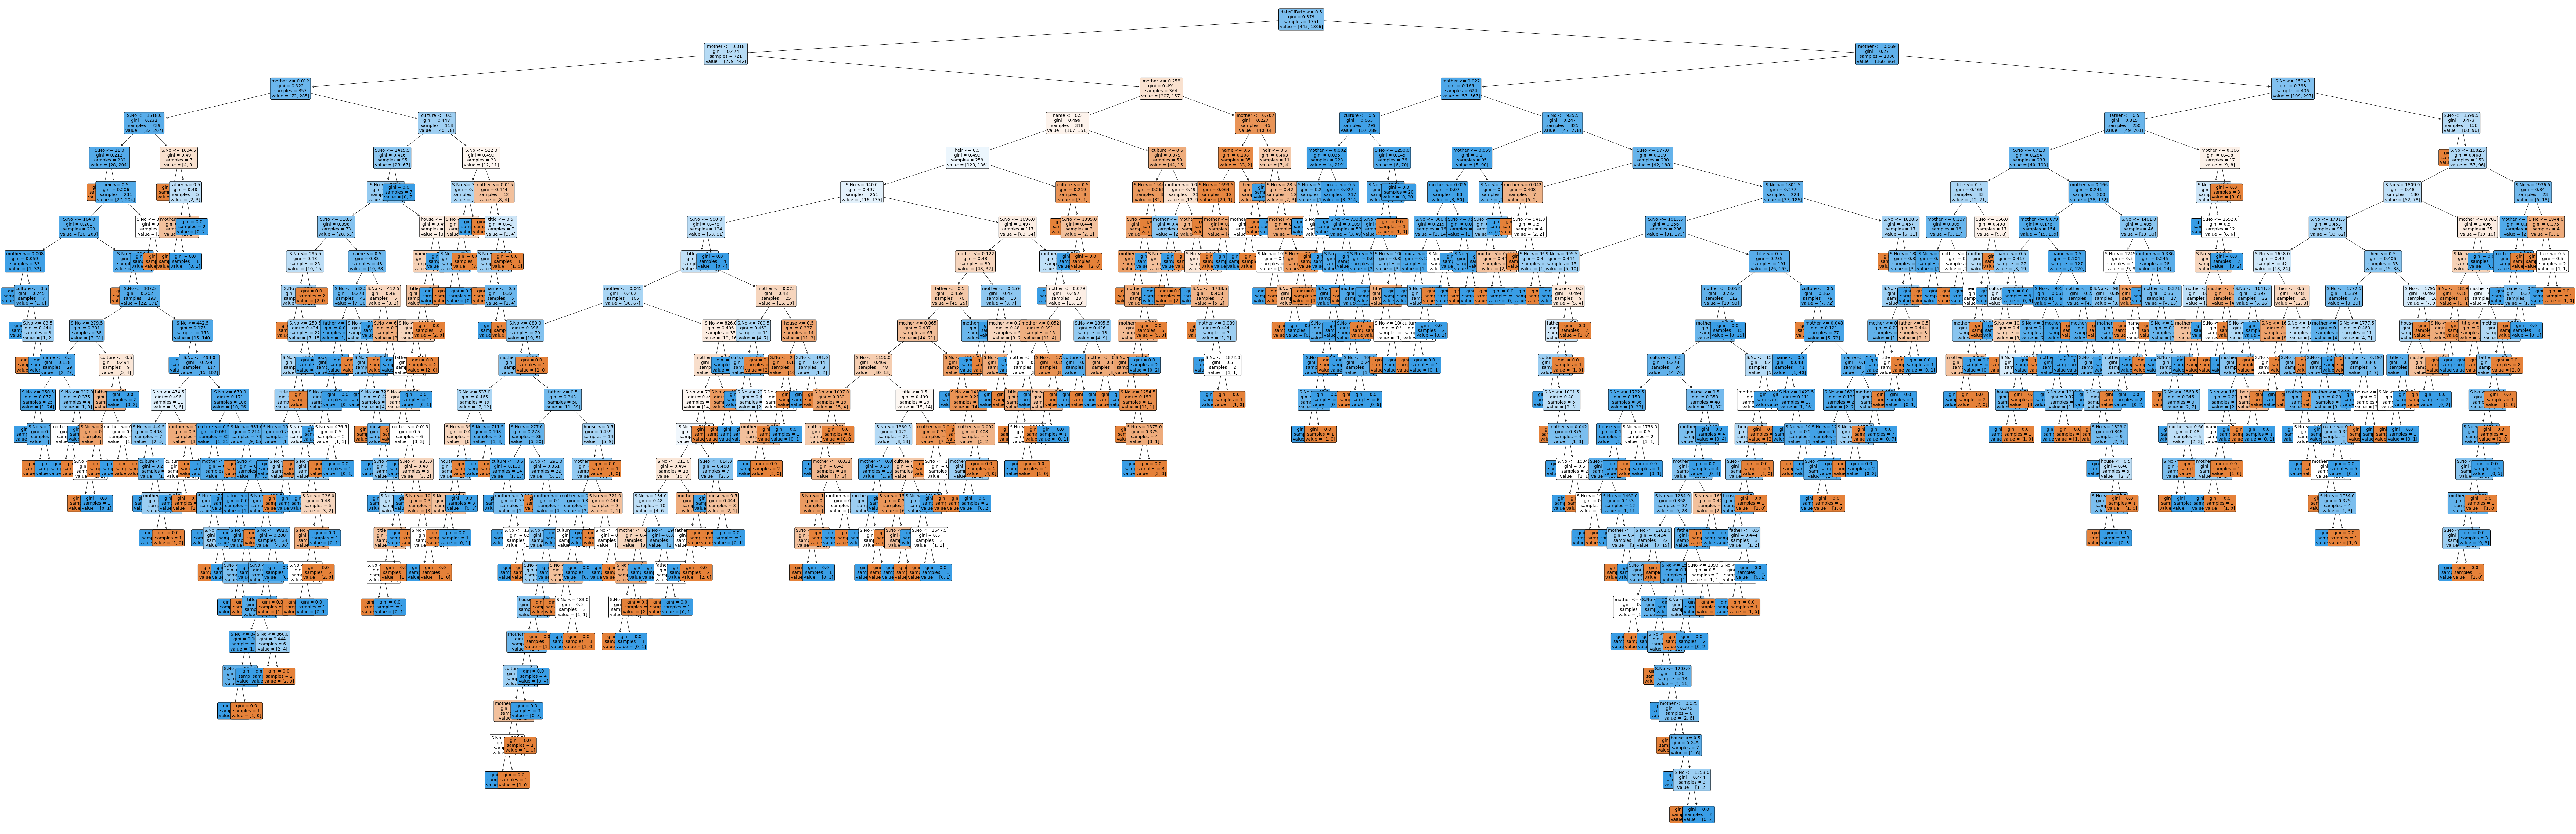

In [45]:
# setting figure size
plt.figure(figsize=(150,50))


# developing a plotted tree
plot_tree(decision_tree = full_tree_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

## Pruned Tree

In [46]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 8,
                                    min_samples_leaf = 40,
                                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7927
Testing  ACCURACY: 0.8667
AUC Score        : 0.7728


In [47]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 5
True Positives : 140



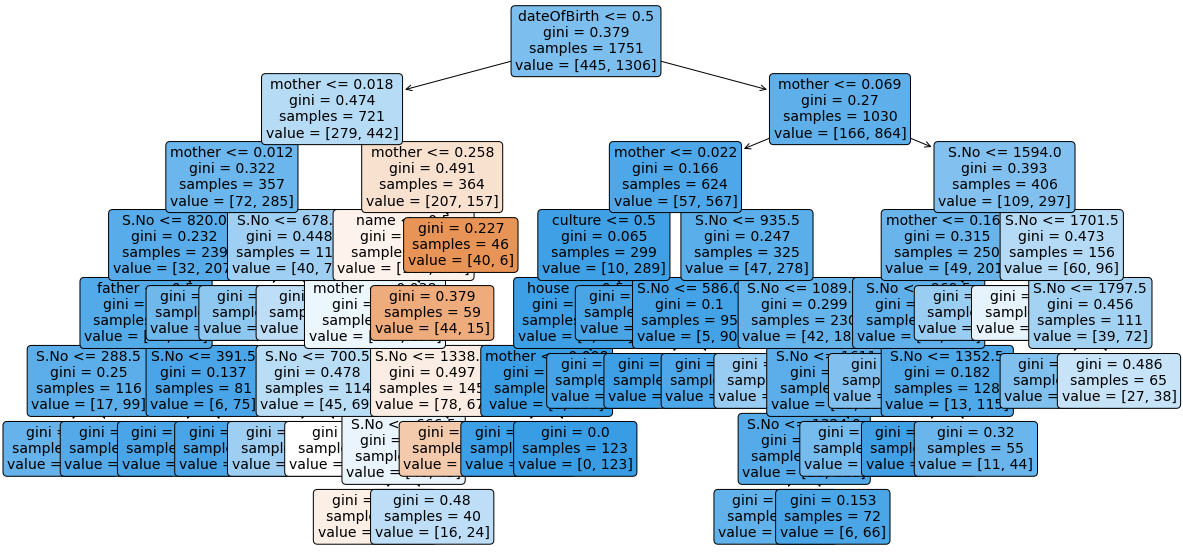

In [48]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

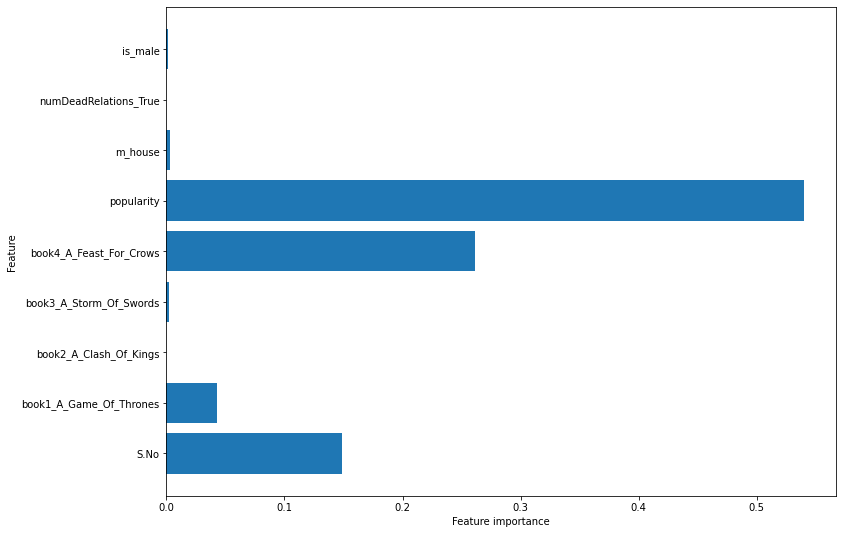

In [49]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = x_train,
                         export = False)

In [50]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.7693         (29, 21, 6, 139)
Full Tree     0.6962         (31, 19, 33, 112)
Pruned Tree   0.7728         (29, 21, 5, 140)



# K-Nearest Neighbors (KNN)

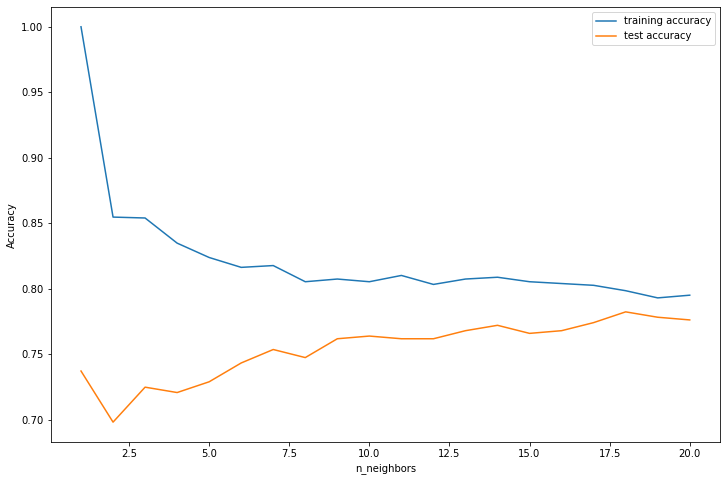

The optimal number of neighbors is: 18


In [51]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [52]:
# determining the optimal number of neighbors
#opt_neighbors = 10

In [53]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7898
Testing  ACCURACY: 0.8103
AUC Score        : 0.6628


In [54]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 5
True Positives : 140



# Hyperparameter Tuning

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Split the dataset into training and testing sets using <em>logit_sig_2</em>.</h4>

In [55]:
# train/test split with the logit_sig variables
got_data   =  got.loc[  : , got_dict['logit_sig_2']]
got_target =  got.loc[  : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Logistic Regression with Default Hyperparameters.</h4>

In [56]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [57]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7664
Testing  ACCURACY: 0.8513
AUC Score        : 0.7428


## Hyperparameter Tuning with RandomizedSearchCV

In [58]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1)
warm_start_range = [False]
solver_range     = ['lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 49 is smaller than n_iter=250. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 1.4000000000000001}
Tuned CV AUC      : 0.6027


In [59]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=1.4000000000000001, max_iter=1000, random_state=219)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Plugging in the values based on the hyperparameter tuning results.</h4>

In [60]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 1.4000000000000001,
                              warm_start   = False,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(got_data, got_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7641
LR Tuned Testing  ACCURACY: 0.8718
LR Tuned AUC Score        : 0.7828


In [61]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 5
True Positives : 140



In [62]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.7693             0.7676            0.8615   (29, 21, 6, 139)
1    Full Tree     0.6962             1.0000            0.7333  (31, 19, 33, 112)
2  Pruned Tree     0.7728             0.7927            0.8667   (29, 21, 5, 140)
3     Tuned LR     0.7828             0.7641            0.8718   (30, 20, 5, 140)

## Hyperparameter Tuning on Classification Trees

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Tuning the hyperparameters for a classification tree model.</h4><br>

In [63]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 20, 2)
leaf_range      = np.arange(1, 50, 2)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 47, 'max_depth': 7, 'criterion': 'gini'}
Tuned Training AUC: 0.6609


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Building a classification tree model based on the hyperparameter tuning results.</h4><br>


In [64]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 47,
                                    max_depth        = 7,
                                    criterion        = 'gini',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7641
Testing  ACCURACY: 0.8667
AUC Score        : 0.7728


In [65]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 5
True Positives : 140



In [66]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0     Logistic     0.7693             0.7676            0.8615   (29, 21, 6, 139)
1    Full Tree     0.6962             1.0000            0.7333  (31, 19, 33, 112)
2  Pruned Tree     0.7728             0.7927            0.8667   (29, 21, 5, 140)
3     Tuned LR     0.7828             0.7641            0.8718   (30, 20, 5, 140)
4   Tuned Tree     0.7728             0.7641            0.8667   (29, 21, 5, 140)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Plotting the tree graphically.</h4>

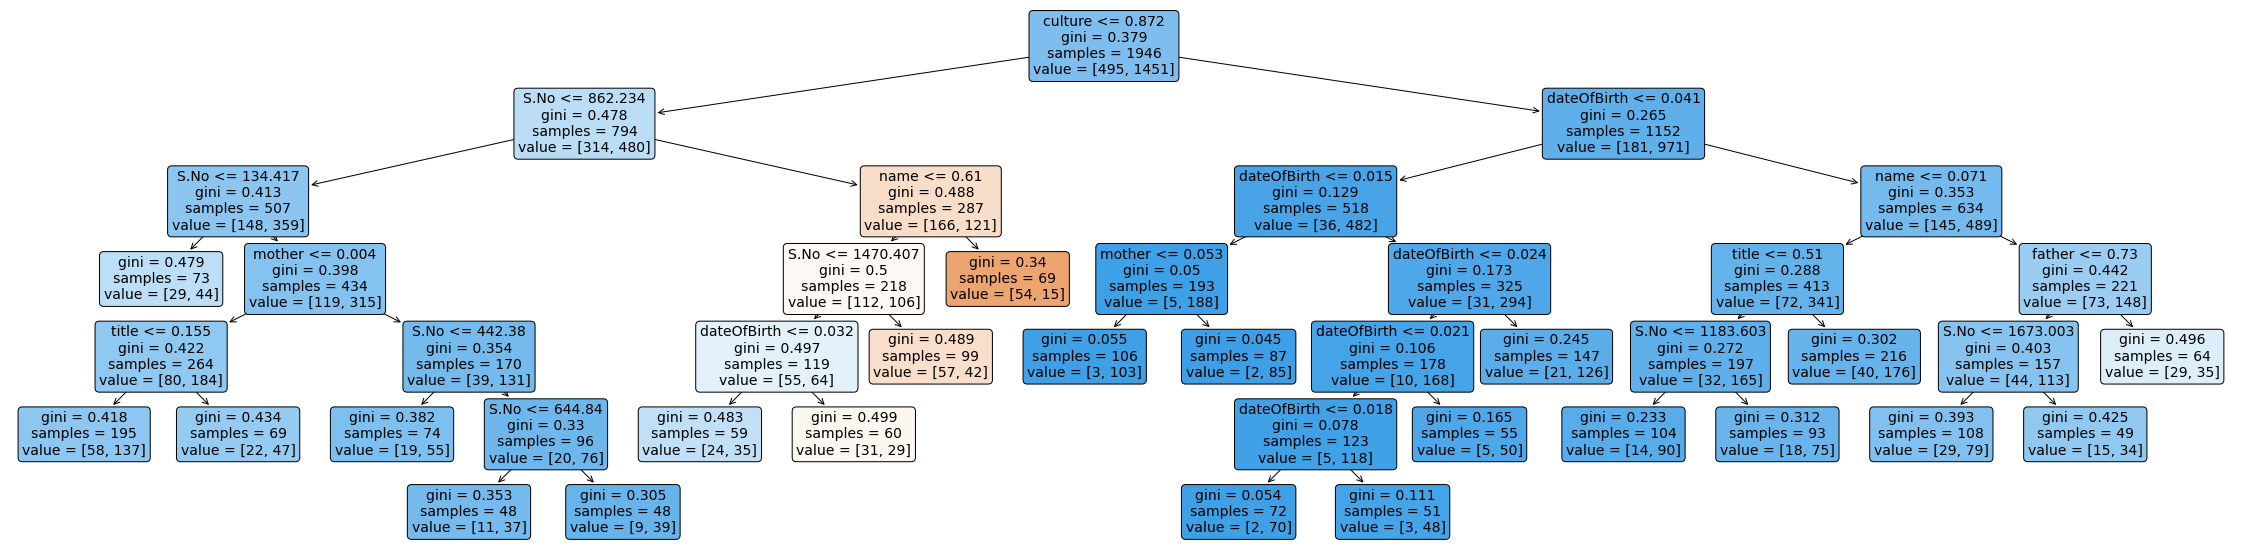

In [67]:
# setting figure size
plt.figure(figsize=(40, 10))


# developing a plotted tree
plot_tree(decision_tree = tree_tuned_fit, 
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

# Random Forest

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Building a random forest model.</h4>

In [68]:
# train/test split with the logit_sig variables
got_data   =  got.loc[ : , got_dict['logit_full']]
got_target =  got.loc[ : , 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)

In [69]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [70]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.8769
AUC Score        : 0.8124


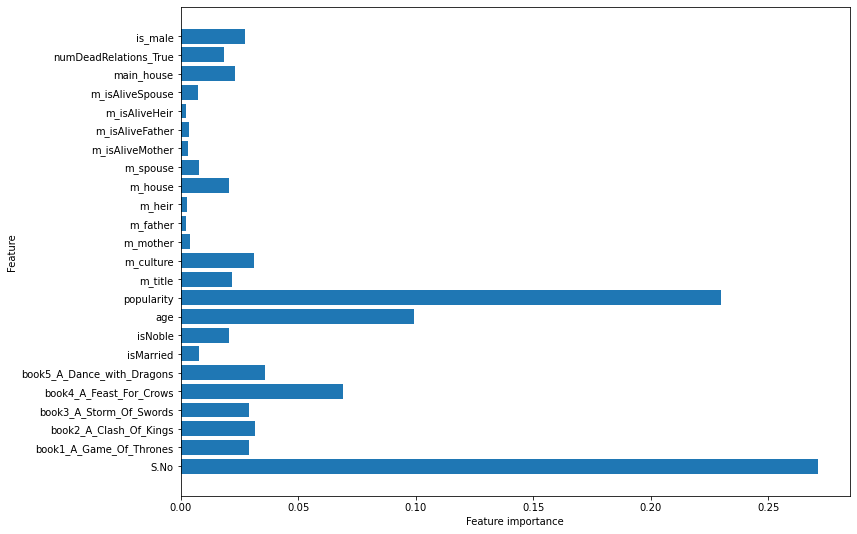

In [71]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [72]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 8
True Positives : 137



In [73]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0              Logistic     0.7693             0.7676            0.8615   (29, 21, 6, 139)
1             Full Tree     0.6962             1.0000            0.7333  (31, 19, 33, 112)
2           Pruned Tree     0.7728             0.7927            0.8667   (29, 21, 5, 140)
3              Tuned LR     0.7828             0.7641            0.8718   (30, 20, 5, 140)
4            Tuned Tree     0.7728             0.7641            0.8667   (29, 21, 5, 140)
5  Random Forest (Full)     0.8124             1.0000            0.8769   (34, 16, 8, 137)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Commenting it out.</h4>

Because the code below takes a lot of time to run, I decided to comment it out and only focus on the results it gave me.

In [74]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(50, 500, 50)
# leaf_range       = np.arange(1, 10, 1)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]
# max_depth_range  = np.arange(1, 4, 1)


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range,
#               'max_depth'        : max_depth_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [75]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

# Model Based on Results

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Tuning it up.</h4>

After getting the results from the code above, I inputed the values in the code below to get the tuned model.

In [76]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 3,
                                      n_estimators     = 50,
                                      warm_start       = False,
                                      bootstrap        = False,
                                      random_state     = 219,
                                      max_depth        = 3)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.771
Forest Tuned Testing  ACCURACY: 0.7692
Forest Tuned AUC Score        : 0.55


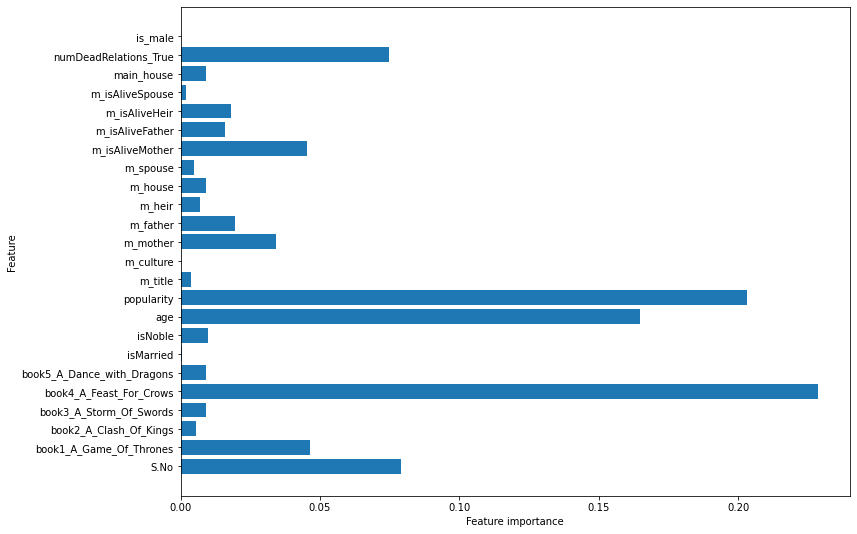

In [77]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [78]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 5
False Positives: 45
False Negatives: 0
True Positives : 145



In [79]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7693             0.7676            0.8615   (29, 21, 6, 139)
1                   Full Tree     0.6962             1.0000            0.7333  (31, 19, 33, 112)
2                 Pruned Tree     0.7728             0.7927            0.8667   (29, 21, 5, 140)
3                    Tuned LR     0.7828             0.7641            0.8718   (30, 20, 5, 140)
4                  Tuned Tree     0.7728             0.7641            0.8667   (29, 21, 5, 140)
5        Random Forest (Full)     0.8124             1.0000            0.8769   (34, 16, 8, 137)
6  Tuned Random Forest (Full)     0.5500             0.7710            0.7692    (5, 45, 0, 145)

# Gradient Boosted Machines

In [80]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8452
Testing ACCURACY : 0.8513
AUC Score        : 0.7624


In [81]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 29
False Positives: 21
False Negatives: 8
True Positives : 137



In [82]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7693             0.7676            0.8615   (29, 21, 6, 139)
1                   Full Tree     0.6962             1.0000            0.7333  (31, 19, 33, 112)
2                 Pruned Tree     0.7728             0.7927            0.8667   (29, 21, 5, 140)
3                    Tuned LR     0.7828             0.7641            0.8718   (30, 20, 5, 140)
4                  Tuned Tree     0.7728             0.7641            0.8667   (29, 21, 5, 140)
5        Random Forest (Full)     0.8124             1.0000            0.8769   (34, 16, 8, 137)
6  Tuned Random Forest (Full)     0.5500             0.7710            0.7692    (5, 45, 0, 145)
7                  GBM (Full)     0.7624             0.8452            0.8513   (29, 21, 8, 137)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>optimizing the hyperparameters of a GBM model using the full dataset.</h4>

In [83]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 1)
# estimator_range    = np.arange(100, 500, 200)
# depth_range        = np.arange(1, 8, 2)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(got_data, got_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [84]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Checking the best estimator for the model.</h4>

In [85]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.6,
                                       max_depth     = 3,
                                       n_estimators  = 40,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(got_data, got_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8864
Testing  ACCURACY: 0.8872
AUC Score        : 0.8193


In [86]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 6
True Positives : 139



In [87]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.7693             0.7676            0.8615   (29, 21, 6, 139)
1                   Full Tree     0.6962             1.0000            0.7333  (31, 19, 33, 112)
2                 Pruned Tree     0.7728             0.7927            0.8667   (29, 21, 5, 140)
3                    Tuned LR     0.7828             0.7641            0.8718   (30, 20, 5, 140)
4                  Tuned Tree     0.7728             0.7641            0.8667   (29, 21, 5, 140)
5        Random Forest (Full)     0.8124             1.0000            0.8769   (34, 16, 8, 137)
6  Tuned Random Forest (Full)     0.5500             0.7710            0.7692    (5, 45, 0, 145)
7                  GBM (Full)     0.7624             0.8452            0.8513   (29, 21, 8, 137)
8                   Tuned GBM     0.8193             0.8864            0.8872   (34, 16, 6, 139)

In [88]:
# comparing results

print(f"""
     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        {model_performance['AUC Score'][0]}       {model_performance['Training Accuracy'][0]}       {model_performance['Testing Accuracy'][0]}       {model_performance['Confusion Matrix'][0]}
2. Full Tree       {model_performance['AUC Score'][1]}       {model_performance['Training Accuracy'][1]}          {model_performance['Testing Accuracy'][1]}       {model_performance['Confusion Matrix'][1]}
3. Pruned Tree     {model_performance['AUC Score'][2]}       {model_performance['Training Accuracy'][2]}       {model_performance['Testing Accuracy'][2]}       {model_performance['Confusion Matrix'][2]}
4. Tuned LR        {model_performance['AUC Score'][3]}       {model_performance['Training Accuracy'][3]}       {model_performance['Testing Accuracy'][3]}       {model_performance['Confusion Matrix'][3]}
5. Tuned Tree      {model_performance['AUC Score'][4]}       {model_performance['Training Accuracy'][4]}       {model_performance['Testing Accuracy'][4]}       {model_performance['Confusion Matrix'][4]}
6. Random Forest   {model_performance['AUC Score'][5]}       {model_performance['Training Accuracy'][5]}          {model_performance['Testing Accuracy'][5]}       {model_performance['Confusion Matrix'][5]}
   (Full)    
7. Tuned Random    {model_performance['AUC Score'][6]}         {model_performance['Training Accuracy'][6]}        {model_performance['Testing Accuracy'][6]}       {model_performance['Confusion Matrix'][6]}
   Forest (Full)
8. GBM (Full)      {model_performance['AUC Score'][7]}       {model_performance['Training Accuracy'][7]}       {model_performance['Testing Accuracy'][7]}       {model_performance['Confusion Matrix'][7]}
9. Tuned GBM *     {model_performance['AUC Score'][8]}       {model_performance['Training Accuracy'][8]}       {model_performance['Testing Accuracy'][8]}       {model_performance['Confusion Matrix'][8]}

* Final Model
""")



     Model          AUC        Training     Testing       Confusion Matrix
                   Score       Accuracy     Accuracy      (TN, FP, FN, TP)
--------------   ----------   ----------   ----------   --------------------
1. Logistic        0.7693       0.7676       0.8615       (29, 21, 6, 139)
2. Full Tree       0.6962       1.0          0.7333       (31, 19, 33, 112)
3. Pruned Tree     0.7728       0.7927       0.8667       (29, 21, 5, 140)
4. Tuned LR        0.7828       0.7641       0.8718       (30, 20, 5, 140)
5. Tuned Tree      0.7728       0.7641       0.8667       (29, 21, 5, 140)
6. Random Forest   0.8124       1.0          0.8769       (34, 16, 8, 137)
   (Full)    
7. Tuned Random    0.55         0.771        0.7692       (5, 45, 0, 145)
   Forest (Full)
8. GBM (Full)      0.7624       0.8452       0.8513       (29, 21, 8, 137)
9. Tuned GBM *     0.8193       0.8864       0.8872       (34, 16, 6, 139)

* Final Model

